# Piecewise linear regression with scikit-learn predictors

The notebook illustrates an implementation of a piecewise linear regression based on [scikit-learn](https://scikit-learn.org/stable/index.html). The bucketization can be done with a [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) or a [KBinsDiscretizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.KBinsDiscretizer.html). A linear model is then fitted on each bucket.

In [1]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

In [2]:
%matplotlib inline

## Piecewise data

Let's build a toy problem based on two linear models.

In [3]:
import numpy
import numpy.random as npr
X = npr.normal(size=(1000,4))
alpha = [4, -2]
t = (X[:, 0] + X[:, 3] * 0.5) > 0
switch = numpy.zeros(X.shape[0])
switch[t] = 1
y = alpha[0] * X[:, 0] * t + alpha[1] * X[:, 0] * (1-t) + X[:, 2]

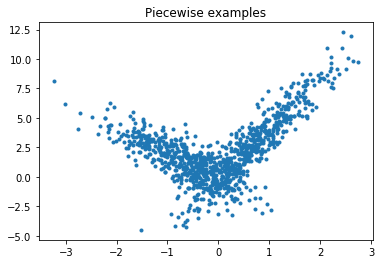

In [4]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
ax.plot(X[:, 0], y, ".")
ax.set_title("Piecewise examples");

## Piecewise Linear Regression with a decision tree

The first example is done with a decision tree.

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X[:, :1], y)

In [6]:
from mlinsights.mlmodel import PiecewiseRegressor
from sklearn.tree import DecisionTreeRegressor

model = PiecewiseRegressor(verbose=True,
                           binner=DecisionTreeRegressor(min_samples_leaf=300))
model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished


PiecewiseRegressor(binner=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                                max_features=None,
                                                max_leaf_nodes=None,
                                                min_impurity_decrease=0.0,
                                                min_impurity_split=None,
                                                min_samples_leaf=300,
                                                min_samples_split=2,
                                                min_weight_fraction_leaf=0.0,
                                                presort=False,
                                                random_state=None,
                                                splitter='best'),
                   estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                              n_jobs=None, normalize=False),
                   n_jobs=None, verbose=True)

In [7]:
pred = model.predict(X_test)
pred[:5]

array([1.37467381, 2.67717732, 4.54134989, 0.23639976, 5.51983771])

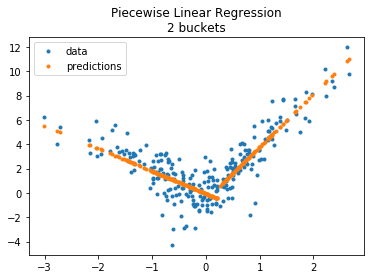

In [8]:
fig, ax = plt.subplots(1, 1)
ax.plot(X_test[:, 0], y_test, ".", label='data')
ax.plot(X_test[:, 0], pred, ".", label="predictions")
ax.set_title("Piecewise Linear Regression\n2 buckets")
ax.legend();

The method *transform_bins* returns the bucket of each variables, the final leave from the tree.

In [9]:
model.transform_bins(X_test)

array([1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1.,
       1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1.,
       0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1.,
       1., 0., 1., 0., 1.

Let's try with more buckets.

In [10]:
model = PiecewiseRegressor(verbose=False,
                           binner=DecisionTreeRegressor(min_samples_leaf=150))
model.fit(X_train, y_train)

PiecewiseRegressor(binner=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                                max_features=None,
                                                max_leaf_nodes=None,
                                                min_impurity_decrease=0.0,
                                                min_impurity_split=None,
                                                min_samples_leaf=150,
                                                min_samples_split=2,
                                                min_weight_fraction_leaf=0.0,
                                                presort=False,
                                                random_state=None,
                                                splitter='best'),
                   estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                              n_jobs=None, normalize=False),
                   n_jobs=None, verbose=False)

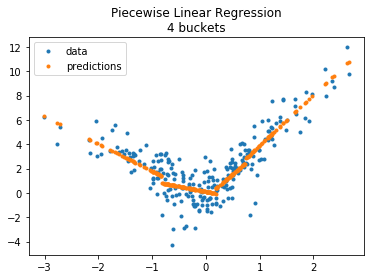

In [11]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
ax.plot(X_test[:, 0], y_test, ".", label='data')
ax.plot(X_test[:, 0], model.predict(X_test), ".", label="predictions")
ax.set_title("Piecewise Linear Regression\n4 buckets")
ax.legend();

## Piecewise Linear Regression with a KBinsDiscretizer

In [12]:
from sklearn.preprocessing import KBinsDiscretizer

model = PiecewiseRegressor(verbose=True,
                           binner=KBinsDiscretizer(n_bins=2))
model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished


PiecewiseRegressor(binner=KBinsDiscretizer(encode='onehot', n_bins=2,
                                           strategy='quantile'),
                   estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                              n_jobs=None, normalize=False),
                   n_jobs=None, verbose=True)

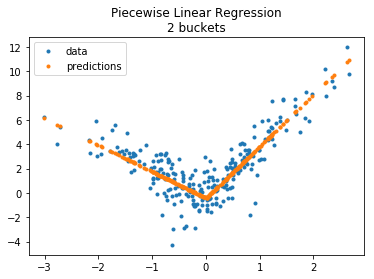

In [13]:
fig, ax = plt.subplots(1, 1)
ax.plot(X_test[:, 0], y_test, ".", label='data')
ax.plot(X_test[:, 0], model.predict(X_test), ".", label="predictions")
ax.set_title("Piecewise Linear Regression\n2 buckets")
ax.legend();

In [14]:
model = PiecewiseRegressor(verbose=True,
                           binner=KBinsDiscretizer(n_bins=4))
model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished


PiecewiseRegressor(binner=KBinsDiscretizer(encode='onehot', n_bins=4,
                                           strategy='quantile'),
                   estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                              n_jobs=None, normalize=False),
                   n_jobs=None, verbose=True)

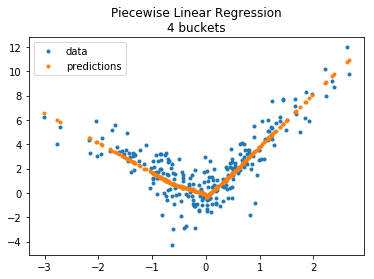

In [15]:
fig, ax = plt.subplots(1, 1)
ax.plot(X_test[:, 0], y_test, ".", label='data')
ax.plot(X_test[:, 0], model.predict(X_test), ".", label="predictions")
ax.set_title("Piecewise Linear Regression\n4 buckets")
ax.legend();

The model does not enforce continuity despite the fast it looks like so. Let's compare with a constant on each bucket.

In [16]:
from sklearn.dummy import DummyRegressor
model = PiecewiseRegressor(verbose='tqdm',
                           binner=KBinsDiscretizer(n_bins=4),
                           estimator=DummyRegressor())
model.fit(X_train, y_train)

100%|██████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1003.36it/s]
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished


PiecewiseRegressor(binner=KBinsDiscretizer(encode='onehot', n_bins=4,
                                           strategy='quantile'),
                   estimator=DummyRegressor(constant=None, quantile=None,
                                            strategy='mean'),
                   n_jobs=None, verbose='tqdm')

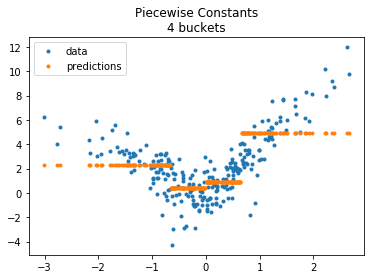

In [17]:
fig, ax = plt.subplots(1, 1)
ax.plot(X_test[:, 0], y_test, ".", label='data')
ax.plot(X_test[:, 0], model.predict(X_test), ".", label="predictions")
ax.set_title("Piecewise Constants\n4 buckets")
ax.legend();

## Next

PR [Model trees (M5P and co)](https://github.com/scikit-learn/scikit-learn/issues/13106) and issue [Model trees (M5P)](https://github.com/scikit-learn/scikit-learn/pull/13732) propose an implementation a piecewise regression with any kind of regression model. It is based on [Building Model Trees](https://github.com/ankonzoid/LearningX/tree/master/advanced_ML/model_tree>). It fits many models to find the best splits.